In [ ]:
import pandas as pd
import numpy as np
bigmart_train=pd.read_csv('Test.csv')
bigmart_train.info()

FileNotFoundError: [Errno 2] No such file or directory: 'Test.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New section

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(bigmart_train, categorical_columns):

    # Initialize the OneHotEncoder
    encoder_bigmart = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

    # Fit and transform the categorical columns
    encoded_data_mart = encoder_bigmart.fit_transform(bigmart_train[categorical_columns])

    # Get the new column names
    encoded_columns_new = encoder_bigmart.get_feature_names_out(categorical_columns)

    # Create a DataFrame with the encoded data
    encoded_df_new_data = pd.DataFrame(encoded_data_mart, columns=encoded_columns_new)

    # Drop the original categorical columns and concatenate the new one-hot encoded columns
    bigmart_train = bigmart_train.drop(categorical_columns, axis=1)
    bigmart_train = pd.concat([bigmart_train, encoded_df_new_data], axis=1)

    return bigmart_train

In [ ]:
# Identify categorical columns
categorical_columns = bigmart_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Call the function to encode the DataFrame
bigmart_train_encoded = one_hot_encode(bigmart_train.copy(), categorical_columns)

# Print the encoded DataFrame
print(bigmart_train_encoded)

NameError: name 'bigmart_train' is not defined

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load Landsat image
with rasterio.open('path_to_landsat_image.tif') as src:
    band4 = src.read(4)  # Red band
    band5 = src.read(5)  # Near Infrared band

# Calculate NDVI
ndvi = (band5 - band4) / (band5 + band4)

# Plot NDVI
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI Map')
plt.show()

ModuleNotFoundError: No module named 'rasterio'

In [ ]:
import ee

# Initialize Earth Engine
ee.Initialize()

# Define the study area and image collection
study_area = ee.Geometry.Rectangle([88.9, 21.6, 89.2, 22.5])
landsat_collection = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR") \
                      .filterBounds(study_area)

# Load pre- and post-cyclone images
pre_cyclone = landsat_collection.filterDate('2020-05-01', '2020-05-10').median()
post_cyclone = landsat_collection.filterDate('2020-06-01', '2020-06-10').median()

# Calculate NDVI
def calculate_ndvi(image):
    ndvi = image.normalizedDifference(['B5', 'B4'])  # NIR and Red bands for Landsat-8
    return ndvi.rename('NDVI')

pre_ndvi = calculate_ndvi(pre_cyclone)
post_ndvi = calculate_ndvi(post_cyclone)

# Visualize the NDVI changes
ndvi_diff = post_ndvi.subtract(pre_ndvi).rename('NDVI_Change')

# Export results to Google Drive
export_task = ee.batch.Export.image.toDrive(
    image=ndvi_diff,
    description='NDVI_Change_Map',
    folder='CycloneAnalysis',
    region=study_area.getInfo(),
    scale=30
)
export_task.start()


EEException: Please authorize access to your Earth Engine account by running

earthengine authenticate

in your command line, or ee.Authenticate() in Python, and then retry.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



In [ ]:
data = pd.read_csv('Tennis_dataset.csv')
data.head()


,Outlook,Temperature,Humidity,Windy,Play Tennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rain,Mild,High,False,Yes
4,Rain,Cool,Normal,False,Yes


In [ ]:
df = pd.DataFrame(data)

In [ ]:
label_encoder=LabelEncoder()
for column in df.columns:
    df[column]=label_encoder.fit_transform(df[column])

In [ ]:
x=df.drop('Outlook',axis=1)
y=df['Outlook']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 66.66666666666666


In [ ]:
exp_data = [[2,1,0,0]]
prediction = model.predict(exp_data)
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
x=df.drop('Play Tennis',axis=1)
y=df['Play Tennis']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#sample dataset

Sample = np.random.rand(100, 2)
print(Sample)


[[0.58837953 0.99974877]
 [0.52674169 0.4536909 ]
 [0.49211505 0.08311151]
 [0.37078665 0.2476543 ]
 [0.7843422  0.11322923]
 [0.06563414 0.18003777]
 [0.17717552 0.37704761]
 [0.42729992 0.12546092]
 [0.46015105 0.94709158]
 [0.7708761  0.79520452]
 [0.95530675 0.42709309]
 [0.5305616  0.95022954]
 [0.17906159 0.21484365]
 [0.91469372 0.00495698]
 [0.14401542 0.57500232]
 [0.86647938 0.42022354]
 [0.56524903 0.79518039]
 [0.59581448 0.88015974]
 [0.59832731 0.44030621]
 [0.94944644 0.82290678]
 [0.75856976 0.16404417]
 [0.49875078 0.79815573]
 [0.60934281 0.70900476]
 [0.15715392 0.47656687]
 [0.82669406 0.64279971]
 [0.17704039 0.43242189]
 [0.04527957 0.21999047]
 [0.5169414  0.06957686]
 [0.97475742 0.62870369]
 [0.19395499 0.47326721]
 [0.75568616 0.99609791]
 [0.81823333 0.92660851]
 [0.71680576 0.8315322 ]
 [0.44174965 0.84508172]
 [0.53069884 0.56810043]
 [0.18360391 0.69539124]
 [0.85065928 0.74708384]
 [0.29458997 0.27532186]
 [0.52608566 0.57559348]
 [0.72045323 0.05860492]


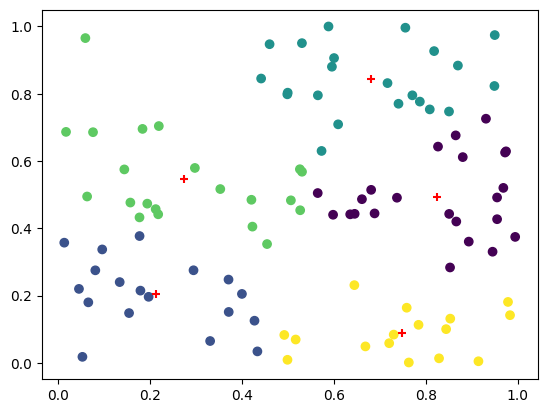

In [ ]:
kmeans = KMeans(n_clusters= 5)
kmeans.fit(Sample)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
plt.scatter(Sample[:,0], Sample[:,1], c = labels, cmap ='viridis')
plt.scatter(centers[:,0], centers[:,1], c = 'red', marker='+')
plt.show()

In [ ]:
!pip install earthengine-api

In [ ]:
import ee

# Initialize Earth Engine
ee.Initialize()

# Define the study area and image collection
study_area = ee.Geometry.Rectangle([88.9, 21.6, 89.2, 22.5])
landsat_collection = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR") \
                      .filterBounds(study_area)

# Load pre- and post-cyclone images
pre_cyclone = landsat_collection.filterDate('2020-05-01', '2020-05-10').median()
post_cyclone = landsat_collection.filterDate('2020-06-01', '2020-06-10').median()

# Calculate NDVI
def calculate_ndvi(image):
    ndvi = image.normalizedDifference(['B5', 'B4'])  # NIR and Red bands for Landsat-8
    return ndvi.rename('NDVI')

pre_ndvi = calculate_ndvi(pre_cyclone)
post_ndvi = calculate_ndvi(post_cyclone)

# Visualize the NDVI changes
ndvi_diff = post_ndvi.subtract(pre_ndvi).rename('NDVI_Change')

# Export results to Google Drive
export_task = ee.batch.Export.image.toDrive(
    image=ndvi_diff,
    description='NDVI_Change_Map',
    folder='CycloneAnalysis',
    region=study_area.getInfo(),
    scale=30
)
export_task.start()


EEException: Please authorize access to your Earth Engine account by running

earthengine authenticate

in your command line, or ee.Authenticate() in Python, and then retry.

In [ ]:

ee.Initialize()


EEException: Please authorize access to your Earth Engine account by running

earthengine authenticate

in your command line, or ee.Authenticate() in Python, and then retry.